In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [288]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [289]:
df[df.duplicated()]# No duplicated items are available in the dataset

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


<AxesSubplot:>

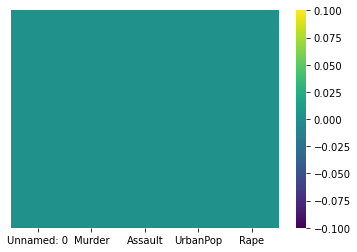

In [290]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")#No missing values are there in the dataset


### Feature scaling to the given dataset

In [291]:
def normal_scale(value):
    return((value-value.mean())/(value.std()))

In [292]:
df_scale=normal_scale(df[["Assault","Murder","Rape","UrbanPop"]])

In [294]:
df_new=pd.concat([df["Unnamed: 0"],df_scale],axis=1)
df_new.head()


,Unnamed: 0,Assault,Murder,Rape,UrbanPop
0,Alabama,0.782839,1.242564,-0.003416,-0.520907
1,Alaska,1.106823,0.507862,2.484203,-1.211764
2,Arizona,1.478803,0.071633,1.042878,0.998980
3,Arkansas,0.230868,0.232349,-0.184917,-1.073593
4,California,1.262814,0.278268,2.067820,1.758923


In [295]:
df_new.describe()

,Assault,Murder,Rape,UrbanPop
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.115774e-16,1.543210e-16,8.704149e-16,-4.618528e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.509042e+00,-1.604405e+00,-1.487447e+00,-2.317136e+00
25%,-7.410815e-01,-8.524835e-01,-6.573508e-01,-7.627068e-01
50%,-1.411127e-01,-1.235217e-01,-1.208577e-01,3.177945e-02
75%,9.388312e-01,7.948553e-01,5.277383e-01,8.435371e-01
max,1.994776e+00,2.206860e+00,2.644350e+00,1.758923e+00


In [296]:
df_new.corr()

,Assault,Murder,Rape,UrbanPop
Assault,1.000000,0.801873,0.665241,0.258872
Murder,0.801873,1.000000,0.563579,0.069573
Rape,0.665241,0.563579,1.000000,0.411341
UrbanPop,0.258872,0.069573,0.411341,1.000000


<AxesSubplot:>

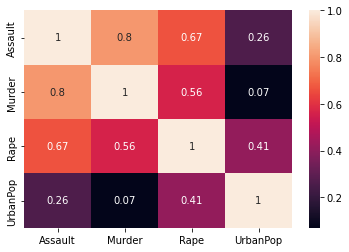

In [297]:
sns.heatmap(df_new.corr(),annot=True)

### Box plot 

<AxesSubplot:xlabel='Rape'>

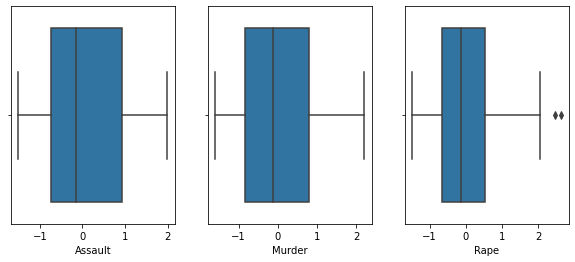

In [311]:
fig,ax=plt.subplots(1,3,figsize=(10,4))
sns.boxplot(df_new["Assault"],ax=ax[0])
sns.boxplot(df_new["Murder"],ax=ax[1])
sns.boxplot(df_new["Rape"],ax=ax[2])



## Hierarchical clustering

In [312]:
from scipy.spatial import distance_matrix

In [313]:
distance_matrix?

In [314]:
a=df_new[["Assault","Murder","Rape","UrbanPop"]].values

In [315]:
df_new["Unnamed: 0"].values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [316]:
distance_matrix=pd.DataFrame(distance_matrix(a,a),columns=df_new["Unnamed: 0"].values,index=df_new["Unnamed: 0"].values)

<AxesSubplot:>

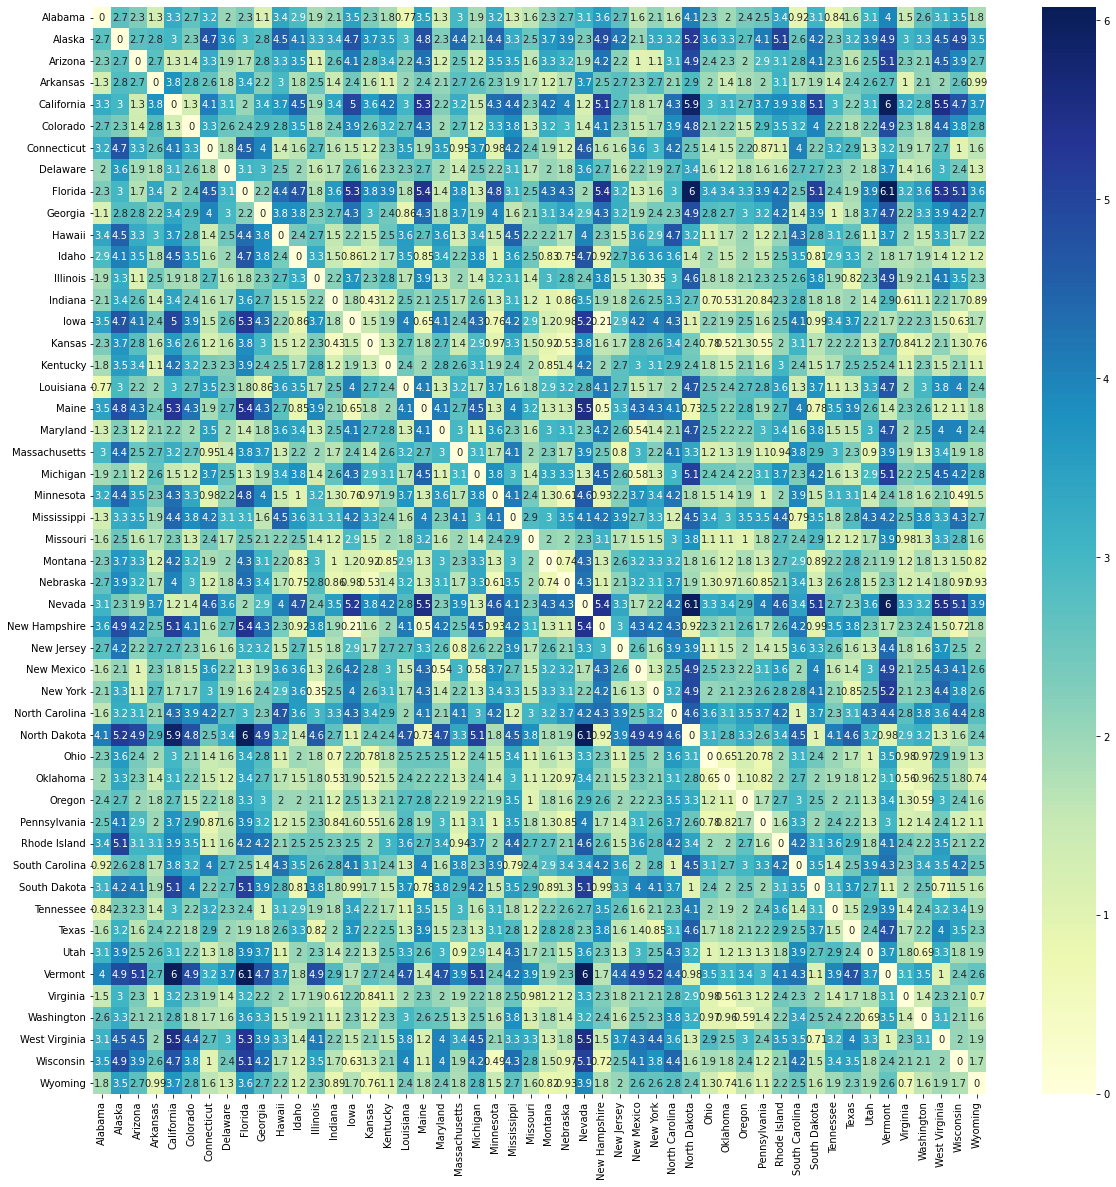

In [317]:
plt.figure(figsize=(20,20))
sns.heatmap(distance_matrix,cmap="YlGnBu", annot=True,yticklabels=True)

In [320]:
df_new[["Assault","Murder","Rape","UrbanPop"]].head()

,Assault,Murder,Rape,UrbanPop
0,0.782839,1.242564,-0.003416,-0.520907
1,1.106823,0.507862,2.484203,-1.211764
2,1.478803,0.071633,1.042878,0.998980
3,0.230868,0.232349,-0.184917,-1.073593
4,1.262814,0.278268,2.067820,1.758923


##### Dendogram

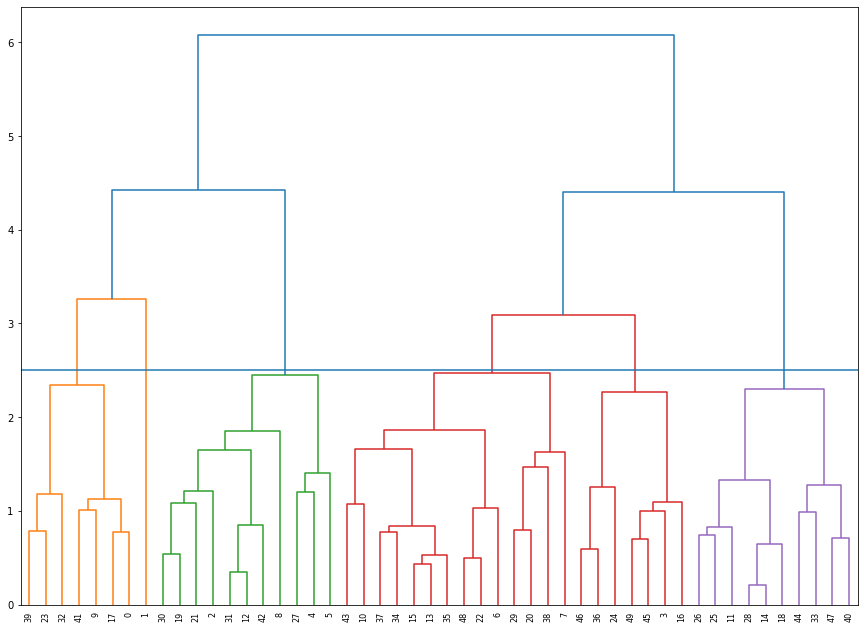

In [321]:
linked=linkage(df_new[["Assault","Murder","Rape","UrbanPop"]],"complete")
# labellist=range(1,59)
plt.figure(figsize=(15,11))
dendrogram(linked,orientation="top",distance_sort="descending",show_leaf_counts=True)
plt.axhline(y=2.5)
plt.show()

### Agglomerative clustering

In [322]:
k=4#Number of cluster

In [323]:
hclustering=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="complete")
hclustering.fit(df_new[["Assault","Murder","Rape","UrbanPop"]])

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [324]:
hclustering.fit_predict(df_new[["Assault","Murder","Rape","UrbanPop"]])

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [325]:
print(hclustering.labels_)

[0 0 2 1 2 2 1 1 2 0 1 3 2 1 3 1 1 0 3 2 1 2 1 0 1 3 3 2 3 1 2 2 0 3 1 1 1
 1 1 0 3 0 2 1 3 1 1 3 1 1]


<Figure size 1440x1440 with 0 Axes>

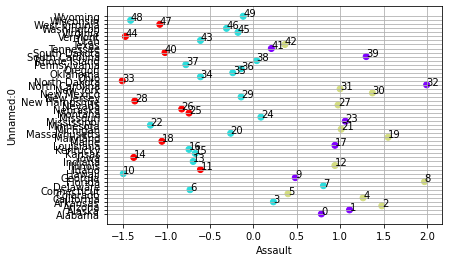

In [326]:
plt.figure(figsize=(20,20))
x=df_new["Assault"]
y=df_new["Unnamed: 0"]
n=range(0,50)
fig,ax=plt.subplots()
ax.scatter(x,y,c=hclustering.labels_,cmap="rainbow")
plt.grid()
plt.xlabel("Assault")
plt.ylabel("Unnamed:0")
for i, txt in enumerate(n):
    ax.annotate(txt,(x[i],y[i]))
    

<AxesSubplot:xlabel='Assault', ylabel='Unnamed: 0'>

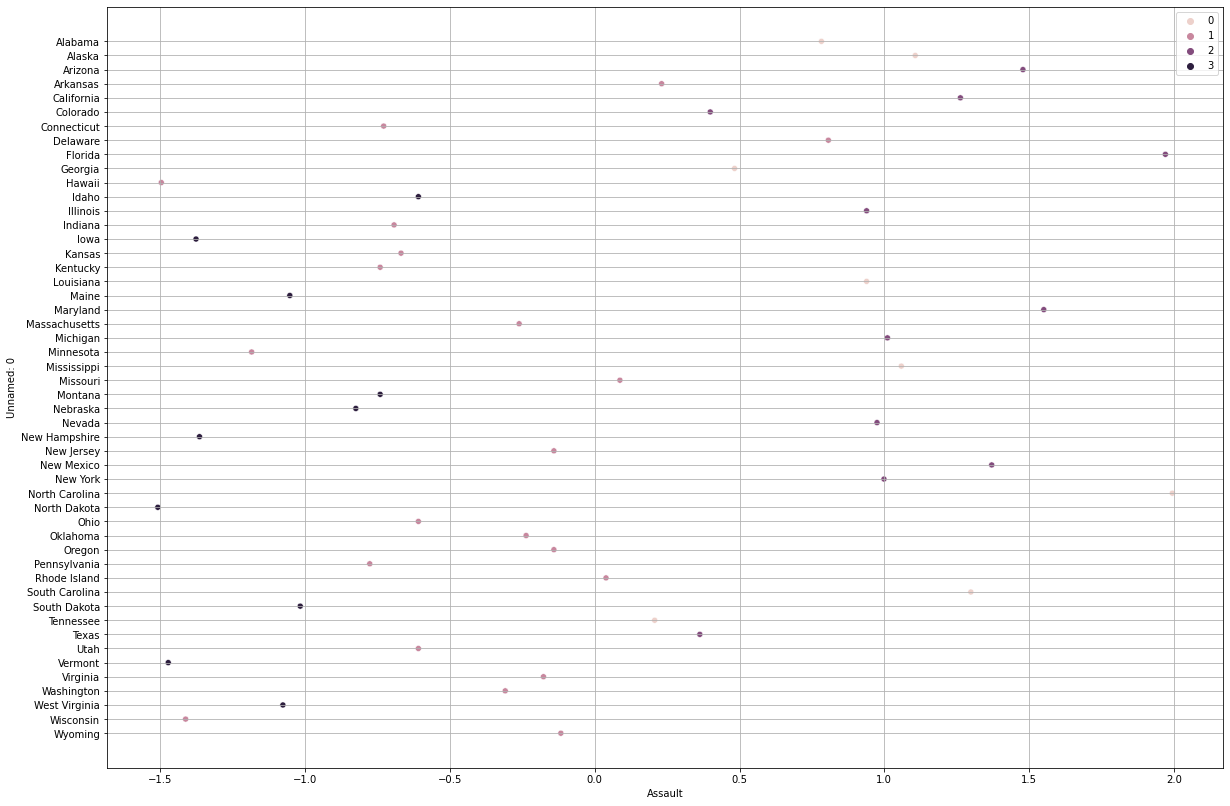

In [327]:
plt.figure(figsize=(20,14))
plt.grid()
sns.scatterplot(x,y,hue=hclustering.labels_)

<Figure size 1440x1440 with 0 Axes>

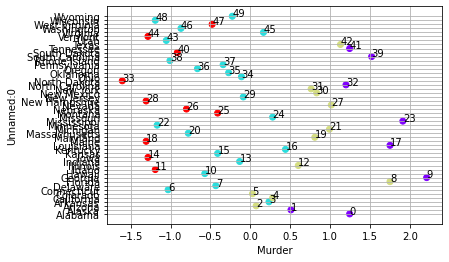

In [328]:
plt.figure(figsize=(20,20))
x1=df_new["Murder"]
y=df_new["Unnamed: 0"]
n=range(0,50)
fig,ax=plt.subplots()
ax.scatter(x1,y,c=hclustering.labels_,cmap="rainbow")
plt.grid()
plt.xlabel("Murder")
plt.ylabel("Unnamed:0")
for i, txt in enumerate(n):
    ax.annotate(txt,(x1[i],y[i]))
    

<AxesSubplot:xlabel='Murder', ylabel='Unnamed: 0'>

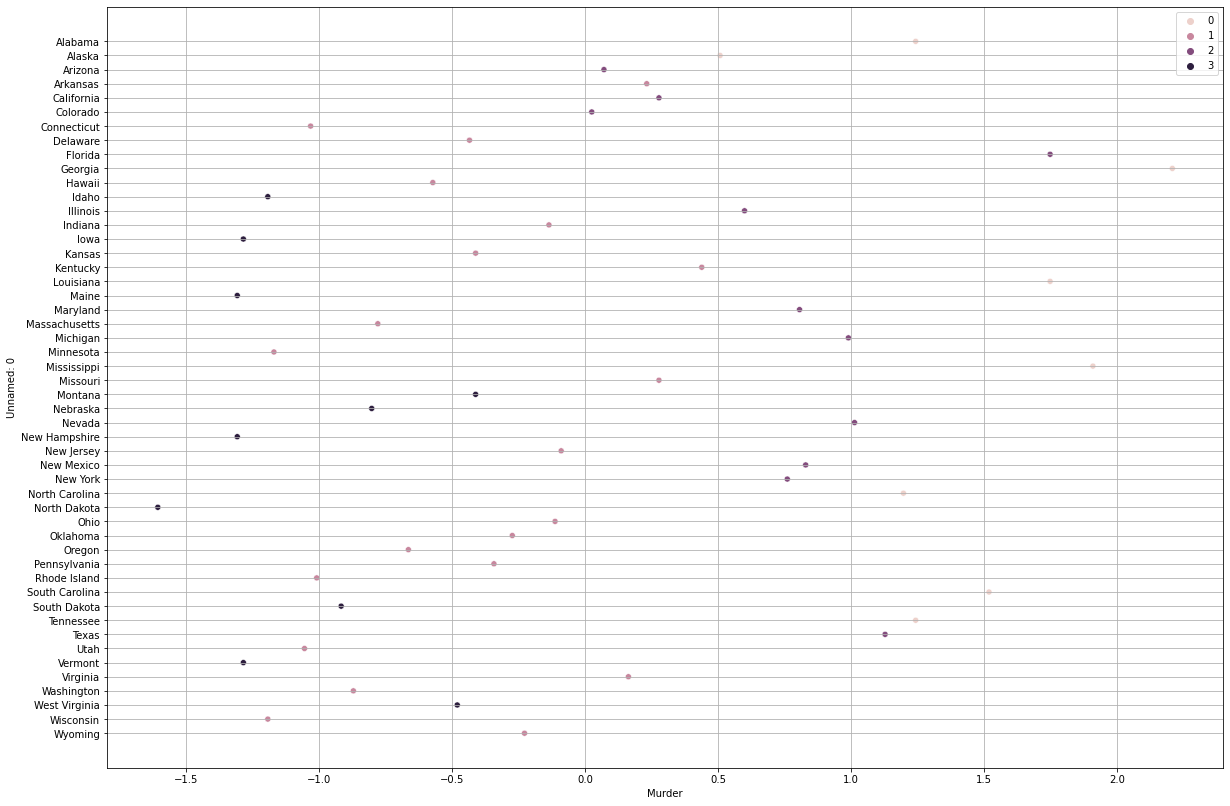

In [329]:
plt.figure(figsize=(20,14))
plt.grid()
sns.scatterplot(df_new["Murder"],y,hue=hclustering.labels_)

<Figure size 1440x1440 with 0 Axes>

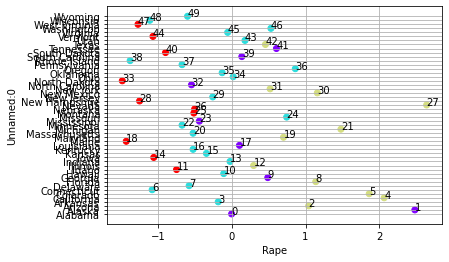

In [330]:
plt.figure(figsize=(20,20))
x2=df_new["Rape"]
y=df_new["Unnamed: 0"]
n=range(0,50)
fig,ax=plt.subplots()
ax.scatter(x2,y,c=hclustering.labels_,cmap="rainbow")
plt.grid()
plt.xlabel("Rape")
plt.ylabel("Unnamed:0")
for i, txt in enumerate(n):
    ax.annotate(txt,(x2[i],y[i]))
    

<AxesSubplot:xlabel='Rape', ylabel='Unnamed: 0'>

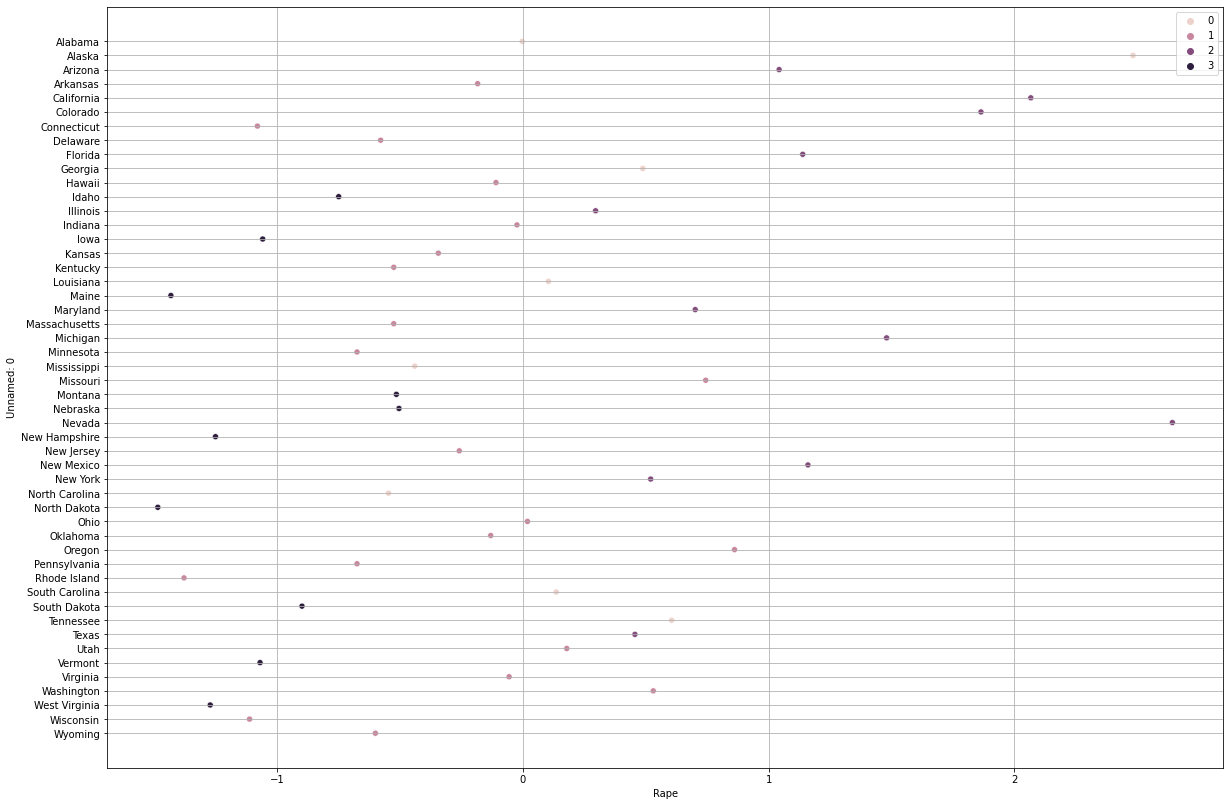

In [331]:
plt.figure(figsize=(20,14))
plt.grid()
sns.scatterplot(df_new["Rape"],y,hue=hclustering.labels_)

<Figure size 1440x1440 with 0 Axes>

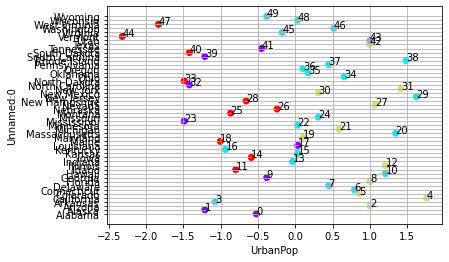

In [332]:
plt.figure(figsize=(20,20))
x3=df_new["UrbanPop"]
y=df_new["Unnamed: 0"]
n=range(0,50)
fig,ax=plt.subplots()
ax.scatter(x3,y,c=hclustering.labels_,cmap="rainbow")
plt.grid()
plt.xlabel("UrbanPop")
plt.ylabel("Unnamed:0")
for i, txt in enumerate(n):
    ax.annotate(txt,(x3[i],y[i]))
    

<AxesSubplot:xlabel='UrbanPop', ylabel='Unnamed: 0'>

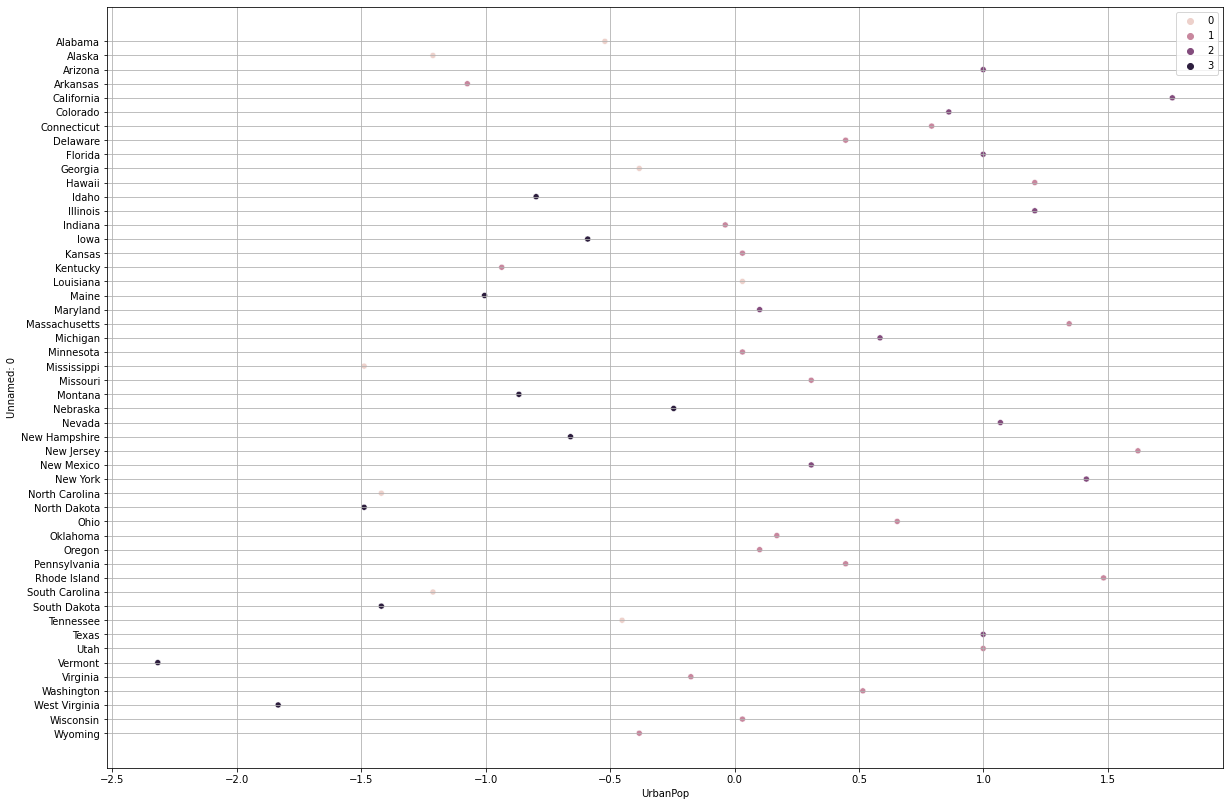

In [333]:
plt.figure(figsize=(20,14))
plt.grid()
sns.scatterplot(df_new["UrbanPop"],y,hue=hclustering.labels_)

## K-means clustering

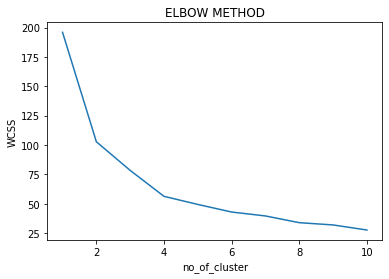

In [334]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmean_mod=KMeans(n_clusters=i, random_state=0)
    model=kmean_mod.fit(df_new[["Assault","Murder","Rape","UrbanPop"]])
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("no_of_cluster")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

In [335]:
k=4# here number of cluster
model=KMeans(n_clusters=4,random_state=0)
kmeans_model=model.fit(df_new[["Assault","Murder","Rape","UrbanPop"]])
kmeans_model

KMeans(n_clusters=4, random_state=0)

In [336]:
kmeans_model.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [337]:
predict=kmeans_model.predict(df_new[["Assault","Murder","Rape","UrbanPop"]])
centroids=kmeans_model.cluster_centers_#Cluster centroid

In [338]:
df_new["cluster_label"]=kmeans_model.labels_

In [339]:
df_new.groupby('cluster_label').agg(['mean']).reset_index()

,cluster_label,Assault,Murder,Rape,UrbanPop
,,mean,mean,mean,mean
0,0,-0.382600,-0.489438,-0.261654,0.575830
1,1,1.039441,0.695070,1.276940,0.722637
2,2,-1.106601,-0.961541,-0.966763,-0.930107
3,3,0.874335,1.411890,0.019271,-0.814521


In [340]:
df_new

,Unnamed: 0,Assault,Murder,Rape,UrbanPop,cluster_label
0,Alabama,0.782839,1.242564,-0.003416,-0.520907,3
1,Alaska,1.106823,0.507862,2.484203,-1.211764,1
2,Arizona,1.478803,0.071633,1.042878,0.998980,1
3,Arkansas,0.230868,0.232349,-0.184917,-1.073593,3
4,California,1.262814,0.278268,2.067820,1.758923,1
5,Colorado,0.398859,0.025715,1.864967,0.860809,1
6,Connecticut,-0.729082,-1.030419,-1.081741,0.791723,0
7,Delaware,0.806838,-0.433474,-0.579946,0.446294,0
8,Florida,1.970778,1.747671,1.138967,0.998980,1
9,Georgia,0.482855,2.206860,0.487702,-0.382735,3


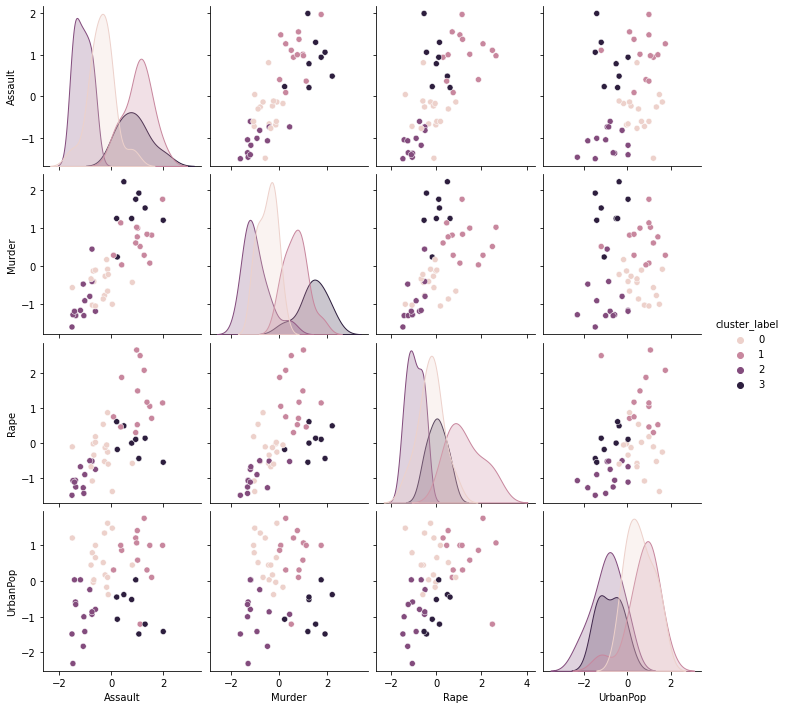

In [341]:
sns.pairplot(df_new,hue="cluster_label")

# DBSCAN 

In [342]:
from sklearn.cluster import DBSCAN


### min_point>=D+1(WHERE D IS THE DIMENSION OF THE DATASET)
#here D= 4
* min split>4+1
*Epsilon should me chosen as small as possible

In [343]:
dbscan=DBSCAN(eps=0.74,min_samples=6)
dbscan.fit(df_new[["Assault","Murder","Rape","UrbanPop"]])
r=dbscan.labels_
d=pd.DataFrame(r)
d1=d.rename({0:"Label"},axis=1)
d1.head()

,Label
0,-1
1,-1
2,-1
3,-1
4,-1


#### Noisy sample are labeled as -1

In [344]:
df_new["dbscan_label"]=dbscan.labels_
df_new.head()

,Unnamed: 0,Assault,Murder,Rape,UrbanPop,cluster_label,dbscan_label
0,Alabama,0.782839,1.242564,-0.003416,-0.520907,3,-1
1,Alaska,1.106823,0.507862,2.484203,-1.211764,1,-1
2,Arizona,1.478803,0.071633,1.042878,0.998980,1,-1
3,Arkansas,0.230868,0.232349,-0.184917,-1.073593,3,-1
4,California,1.262814,0.278268,2.067820,1.758923,1,-1


In [345]:
df1=df_new[["Assault","Murder","Rape","UrbanPop","dbscan_label"]]

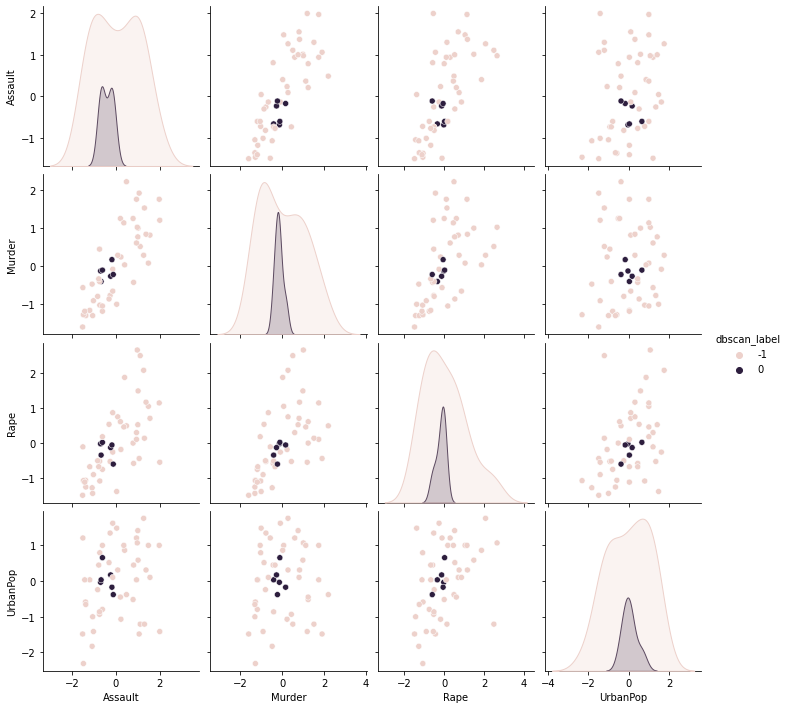

In [346]:
sns.pairplot(df1,hue="dbscan_label")

<AxesSubplot:xlabel='Unnamed: 0', ylabel='UrbanPop'>

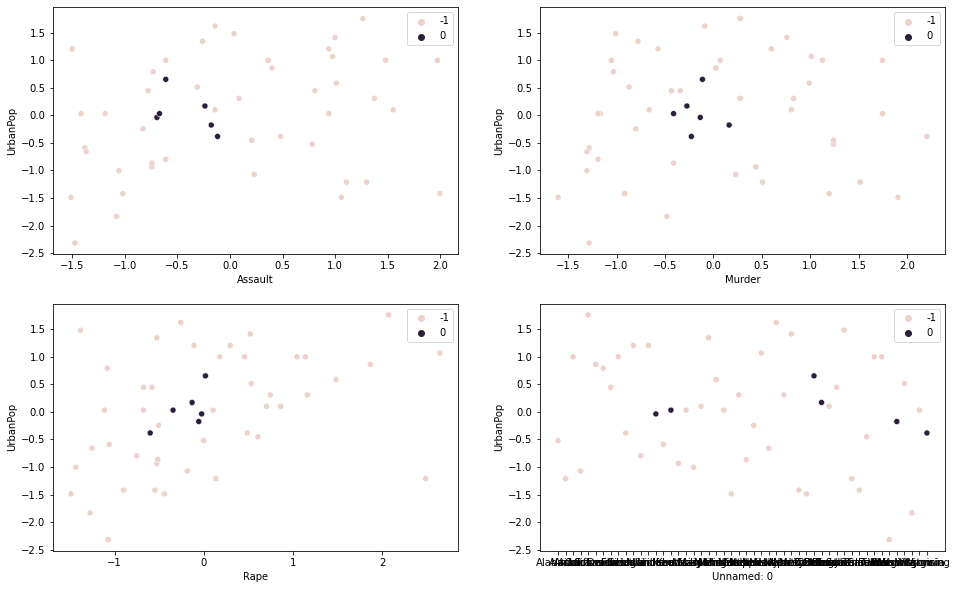

In [347]:
# Plot Clusters
fig,ax=plt.subplots(2,2,figsize=(16,10))  
sns.scatterplot(df_new["Assault"],df_new['UrbanPop'], hue=dbscan.labels_,ax=ax[0,0])
sns.scatterplot(df_new["Murder"],df_new['UrbanPop'], hue=dbscan.labels_,ax=ax[0,1])
sns.scatterplot(df_new["Rape"],df_new['UrbanPop'], hue=dbscan.labels_,ax=ax[1,0])
sns.scatterplot(df_new["Unnamed: 0"],df_new['UrbanPop'], hue=dbscan.labels_,ax=ax[1,1])